# Temperature Example

Goal: We want to smooth temperature data for each region (e.g. Africa, Europe).

## Imports & set seaborn theme

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import the package locally:
from src.lowess_grouped.lowess_grouped import lowess_grouped
# alternatively import the package after installing it with pip:
# from lowess_grouped.lowess_grouped import lowess_grouped

In [2]:
sns.set_theme(style="white")

## Original data

We have the temperature data by year, foreach region.
As can be seen in the plot below, the original data is quite sharp and chaotic.

In [3]:
temp_region = pd.read_csv("./data/temperature-by-region.csv")
temp_region.head(3)

,year,region_code,temperature_anomaly,region_name
0,1900,2.0,-0.016705,Africa
1,1900,9.0,-0.307362,Oceania
2,1900,19.0,-0.160803,Americas


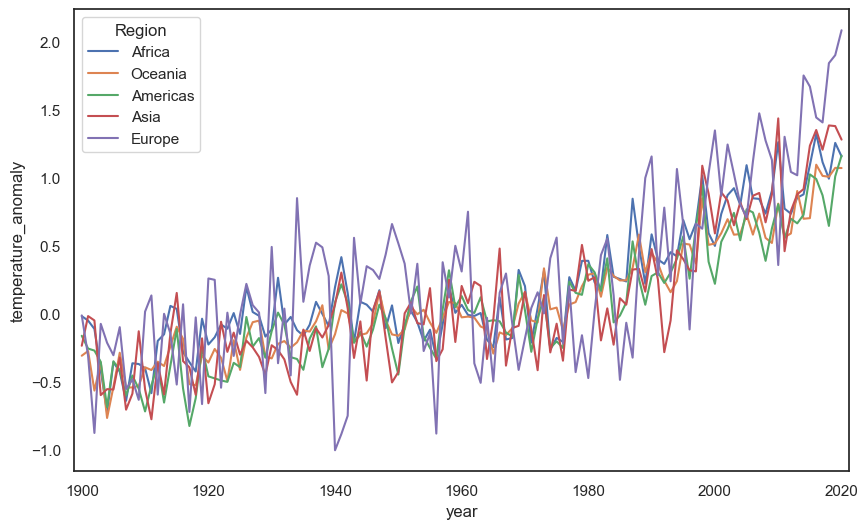

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.margins(x=0.01)
plot = sns.lineplot(x="year", y="temperature_anomaly", hue="region_name", data=temp_region, ax=ax)
plot.get_legend().set_title("Region");

## Smoothed data

Now let's smooth the data with lowess, for each region.
The `frac` parameter specifies how strongly the data should be smoothed.

In [5]:
temp_region = lowess_grouped(temp_region,"year", "temperature_anomaly", "region_name", frac=0.05)

If we look at the plot, we can see that the data is much more smooth!

In [6]:
temp_region.head(3)

,year,region_code,temperature_anomaly,region_name,temperature_anomaly_smooth
0,1900,2.0,-0.016705,Africa,0.029955
1,1900,9.0,-0.307362,Oceania,-0.292418
2,1900,19.0,-0.160803,Americas,-0.164371


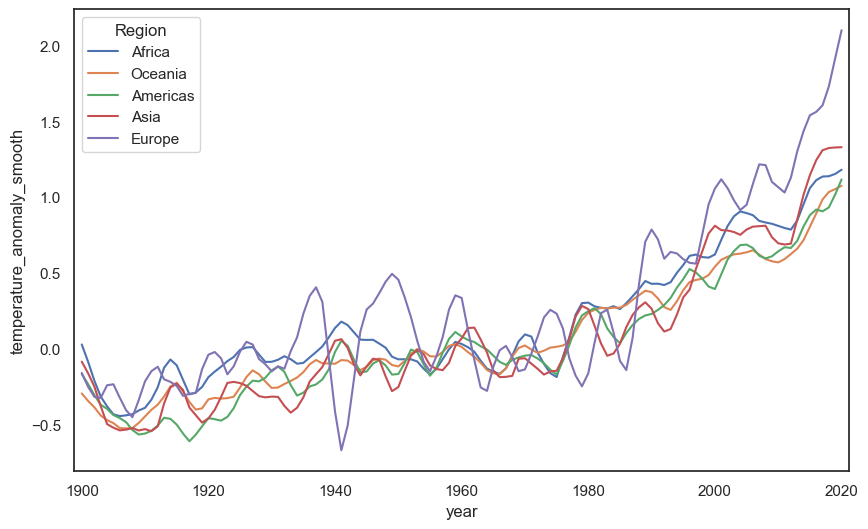

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.margins(x=0.01)
plot = sns.lineplot(x="year", y="temperature_anomaly_smooth", hue="region_name", data=temp_region, ax=ax)
plot.get_legend().set_title("Region");